Step1- Download the dataset

Step2- Tasks to Perform

1. Load the Dataset

In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv("customer_data.csv")

# Display the first few rows
print(df.head())

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


2. Inspect the Dataset

In [31]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate entries
print("Duplicate values:", df.duplicated().sum())

# Check data types of each column
print("\nData Types:\n", df.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

Shape of dataset: (200, 5)
Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64
Duplicate values: 0

Data Types:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


3. Data Cleaning

In [32]:
# Drop Customer ID column (not useful for clustering)
if "Customer ID" in df.columns:
    df.drop(columns=["Customer ID"], inplace=True)

# Handle missing values (if any)
df.dropna(inplace=True)  # Drop rows with missing values

# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Convert column names to a standard format (if needed)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Verify dataset after cleaning
print("\nDataset after cleaning:")
print(df.info())


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customerid          200 non-null    int64 
 1   genre               200 non-null    object
 2   age                 200 non-null    int64 
 3   annual_income_(k$)  200 non-null    int64 
 4   spending_score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Step 2: Data Preprocessing - Standardization
Clustering algorithms like K-Means and Hierarchical Clustering are sensitive to different feature magnitudes, so we need to standardize the data.

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select features for clustering
features = ["age", "annual_income_(k$)", "spending_score"]  # Adjust column names if needed
df_selected = df[features]

# Option 1: Standard Scaling (Mean = 0, Std Dev = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Option 2: Min-Max Scaling (Values between 0 and 1)
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df_selected)

# Convert scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Display first few rows after scaling
print("First 5 rows after scaling:\n", df_scaled.head())

First 5 rows after scaling:
         age  annual_income_(k$)  spending_score
0 -1.424569           -1.738999       -0.434801
1 -1.281035           -1.738999        1.195704
2 -1.352802           -1.700830       -1.715913
3 -1.137502           -1.700830        1.040418
4 -0.563369           -1.662660       -0.395980


Step 3: Clustering - Finding Optimal Clusters & Applying K-Means
Now, let's perform K-Means Clustering and determine the optimal number of clusters using:
✅ Elbow Method (WCSS - Within-Cluster Sum of Squares)
✅ Silhouette Score (Measures how well-defined the clusters are)

1. Finding the Optimal Number of Clusters (Elbow Method)

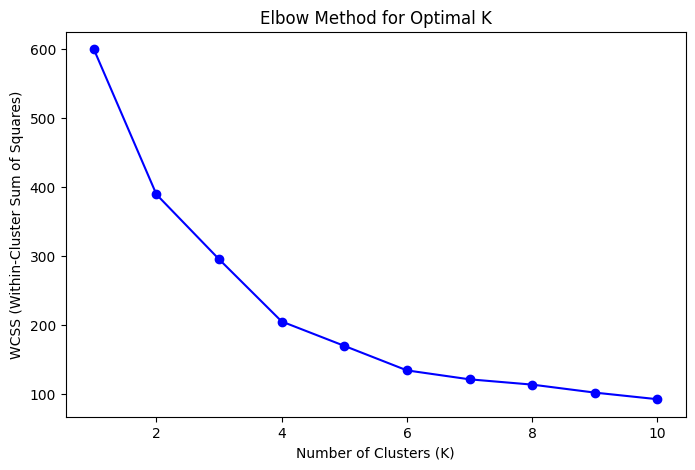

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List to store WCSS values
wcss = []

# Trying different values of K (1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

2. Validate with Silhouette Score

In [35]:
# Trying different K values and checking Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, cluster_labels)
    print(f"For k = {k}, Silhouette Score = {sil_score:.4f}")

For k = 2, Silhouette Score = 0.3355
For k = 3, Silhouette Score = 0.3579
For k = 4, Silhouette Score = 0.4040
For k = 5, Silhouette Score = 0.4085
For k = 6, Silhouette Score = 0.4311
For k = 7, Silhouette Score = 0.4101
For k = 8, Silhouette Score = 0.3674
For k = 9, Silhouette Score = 0.3744
For k = 10, Silhouette Score = 0.3619


3. Apply K-Means Clustering (Using Optimal K)

In [36]:
# Set optimal number of clusters (replace with the chosen K from the Elbow Method)
optimal_k = 6  # Silhouette Score is highest for k=6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
df_scaled["cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["cluster"] = df_scaled["cluster"]

# Display first few rows with cluster assignments
print(df.head())

   customerid   genre  age  annual_income_(k$)  spending_score  cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        5
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        5


Step 4: Visualization
Create visualizations to represent the clusters:

2D Scatter Plot:
■ Use PCA (Principal Component Analysis) or t-SNE to reduce
dimensions to two for visualization.
■ Plot clusters in different colors

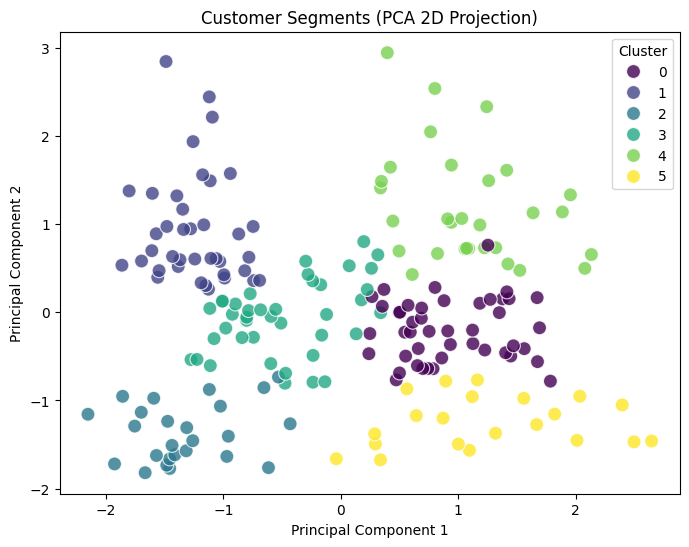

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=["cluster"]))  # Exclude cluster column

# Convert PCA results into DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = df_scaled["cluster"]

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["cluster"], palette="viridis", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments (PCA 2D Projection)")
plt.legend(title="Cluster")
plt.show()

Pair Plots: Visualize relationships between features within clusters.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) th

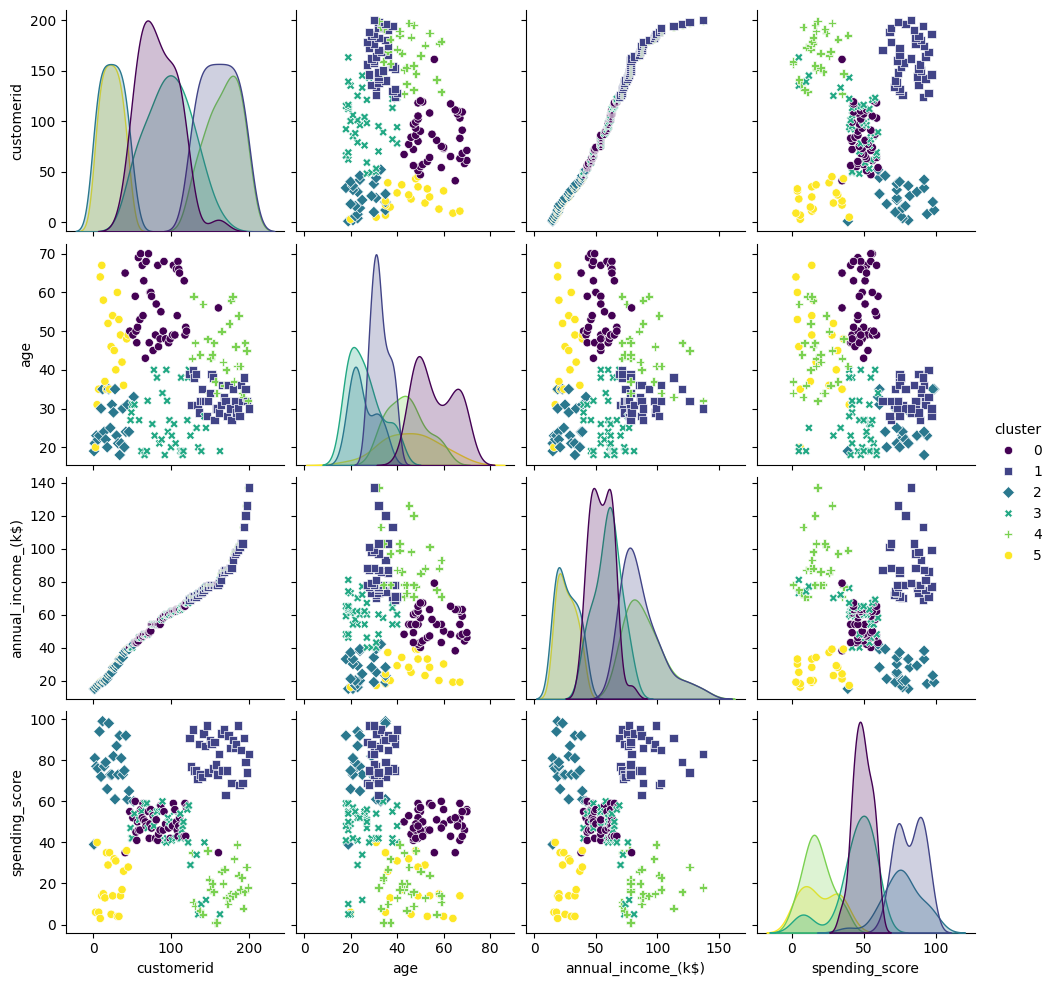

In [38]:
# Add cluster labels back to original DataFrame for visualization
df_visual = df.copy()

# Pair Plot with hue as clusters
sns.pairplot(df_visual, hue="cluster", palette="viridis", diag_kind="kde", markers=["o", "s", "D", "X", "P"])
plt.show()

Centroid Visuals: Show the centroid of each cluster for better interpretation.

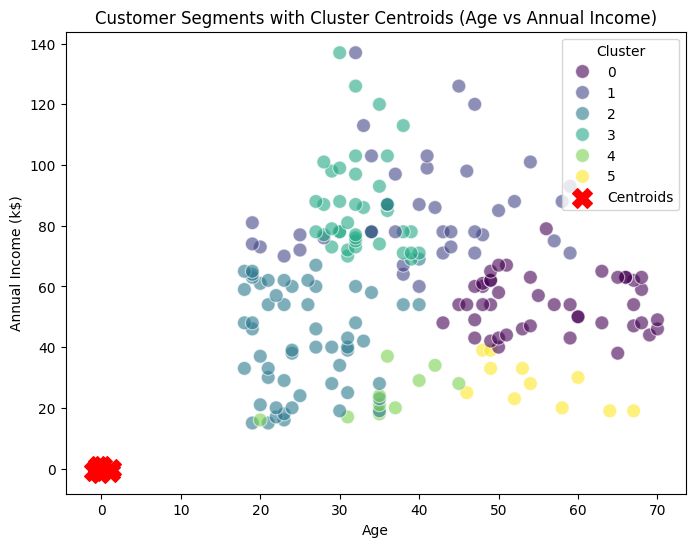

In [45]:
# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Create a scatter plot showing customer clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="annual_income_(k$)", hue="cluster", palette="viridis", s=100, alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title
plt.title("Customer Segments with Cluster Centroids (Age vs Annual Income)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="Cluster", loc="upper right")
plt.show()


In [39]:
# Set optimal number of clusters (replace with the chosen K from the Elbow Method)
optimal_k = 6  # For k=6 the Silhouette Score is highest

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
df_scaled["cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["cluster"] = df_scaled["cluster"]

# Display first few rows with cluster assignments
print(df.head())

   customerid   genre  age  annual_income_(k$)  spending_score  cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        4
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        4


Deliverables
1. Clustered Dataset:
Add a new column to the dataset with the assigned cluster labels for each
customer.

A new column "cluster" is added to the dataset, indicating each customer’s assigned cluster.
The dataset is saved as customer_data_clustered.csv for further analysis.


In [40]:
# Save the dataset with cluster labels
df.to_csv("customer_data_clustered.csv", index=False)

print("Clustered dataset saved as 'customer_data_clustered.csv'!")

Clustered dataset saved as 'customer_data_clustered.csv'!


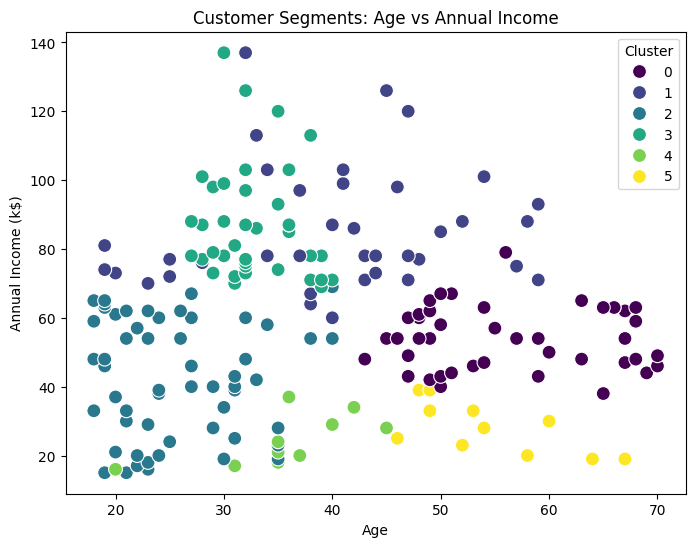

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot showing customer clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="annual_income_(k$)", hue="cluster", palette="viridis", s=100)
plt.title("Customer Segments: Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="Cluster", loc="upper right")
plt.show()

2. Visualizations:
○ A 2D scatter plot representing customer clusters.
○ Elbow Method plot showing the optimal number of clusters.
○ Any additional visuals (e.g., pair plots, heatmaps).

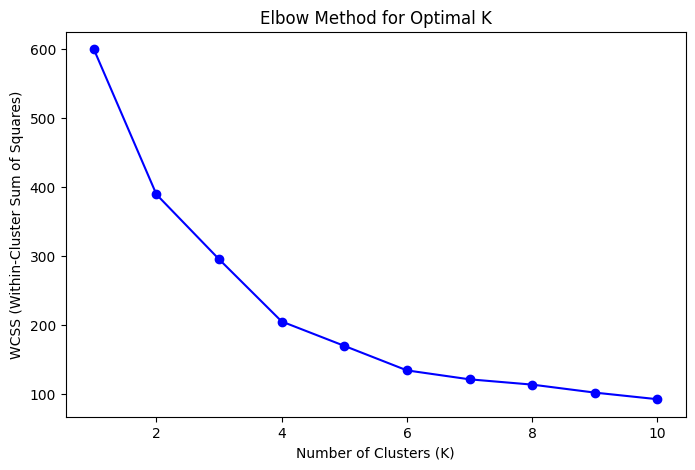

In [42]:
# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

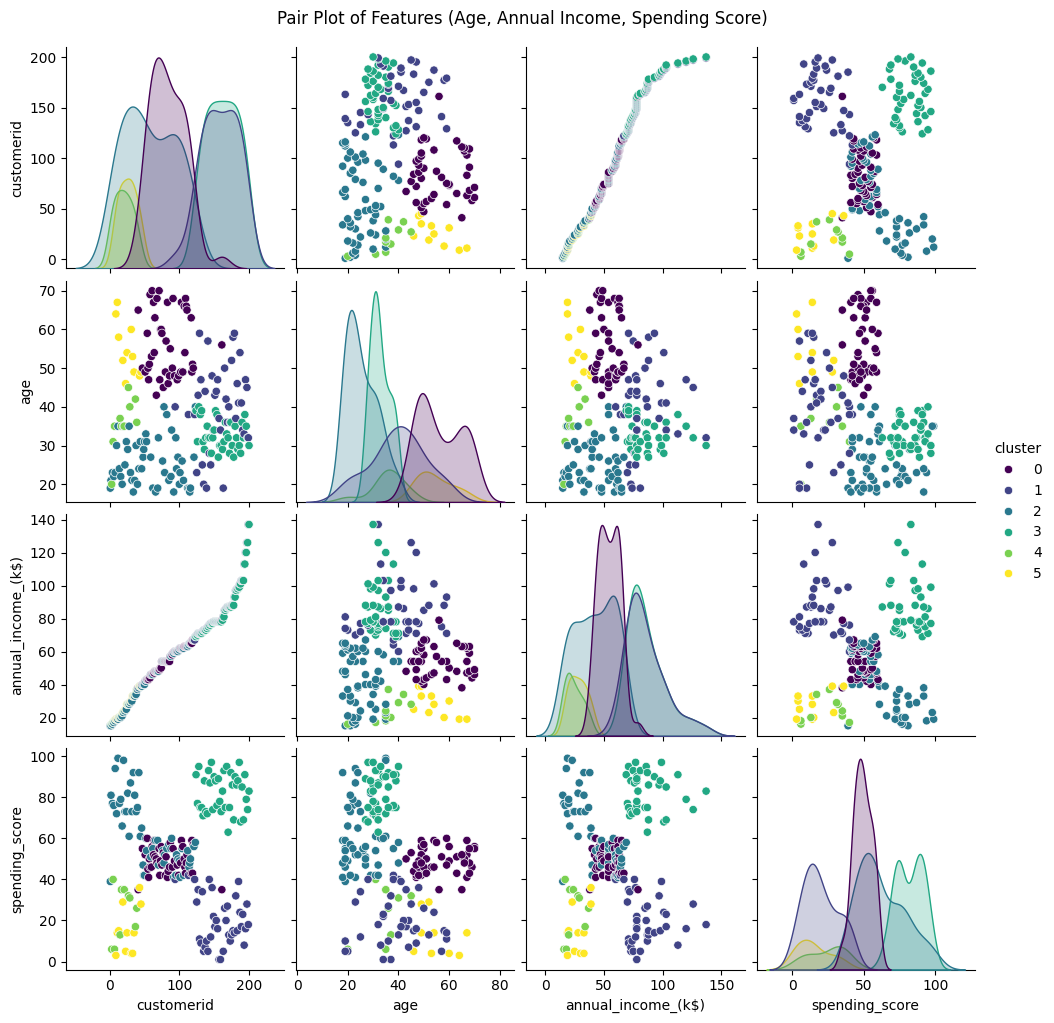

In [43]:
# Pair Plot to visualize relationships between features, colored by cluster
sns.pairplot(df, hue="cluster", palette="viridis", diag_kind="kde")
plt.suptitle("Pair Plot of Features (Age, Annual Income, Spending Score)", y=1.02)
plt.show()

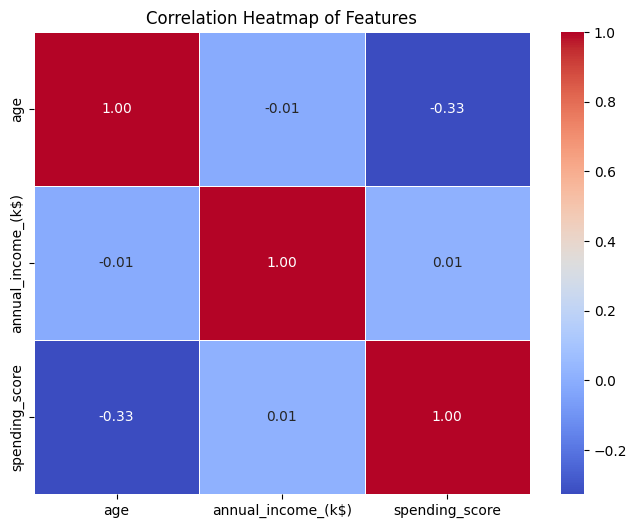

In [44]:
# Correlation Heatmap
correlation_matrix = df[["age", "annual_income_(k$)", "spending_score"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

Recommendations

Based on the customer segmentation data you've provided (with clusters assigned), we can derive several actionable insights and recommendations for different customer groups. Let's break it down by cluster and provide insights for each:

Cluster 0: Low-Spending, Low-Engagement
Cluster Characteristics:

Customers in this cluster have low spending scores and low annual income. These customers are less likely to make frequent purchases and might have lower engagement with your products or services.
Actionable Insights:

Target with low-cost promotions to engage them without overwhelming them financially. Introduce entry-level products or discount offers to get them interested in making their first purchase.
You could also offer loyalty programs or referral incentives to encourage them to engage more and bring in new customers.
Nurture engagement through email marketing campaigns focused on value-driven content, like free shipping or exclusive deals for first-time buyers.
Marketing Strategy:

Introduce budget-friendly products and engage them with seasonal promotions or limited-time discounts.
Promote small-value bundles or give discounts on their first purchase to make the shopping experience easier and more appealing.
Cluster 1: Moderate-Spending, Mid-Level Engagement
Cluster Characteristics:

These customers have moderate spending scores and average annual income. They're not the highest spenders, but they engage with your brand to some extent.
Actionable Insights:

Focus on these customers by offering special deals or upselling opportunities for complementary products that align with their spending behavior.
Provide re-engagement campaigns with product recommendations based on past purchases.
Consider offering discounts for referrals to convert them into more loyal customers.
Marketing Strategy:

Use personalized email marketing based on their purchase history.
Offer tiered discounts or loyalty programs to encourage more frequent purchases.
Cluster 2: High-Spending, Engaged Customers
Cluster Characteristics:

Customers in this group have a high spending score and moderate to high income. They're regular buyers and more engaged with your brand.
Actionable Insights:

Target them with premium products or exclusive offers, as they are more willing to spend. These customers are likely to respond positively to personalized product recommendations and VIP offers.
Offer loyalty programs to reward their continued engagement and create brand ambassadors who can spread the word.
Consider creating VIP experiences or providing early access to new products as they are high-value customers.
Marketing Strategy:

Implement personalized discounts, exclusive promotions, and new product launches tailored to this segment.
VIP or membership programs that offer benefits like free shipping, special access, or bonus points for repeat purchases would be well-received.
Cluster 3: Moderate-Spending, Age-Oriented Customers
Cluster Characteristics:

Customers in this cluster have moderate spending scores and varying income levels. These customers might be more price-sensitive and could fall into the middle age group.
Actionable Insights:

Offer affordable products or discounted bundles that meet their needs without breaking the bank.
Introduce loyalty rewards or referral bonuses to encourage more spending.
Focus on value-for-money campaigns, highlighting the quality and price advantage of your products.
Marketing Strategy:

Offer loyalty programs, and seasonal discounts, and use email marketing to encourage additional purchases.
Segment them by age or interests to offer age-appropriate products (e.g., work-related products for mid-career customers).
Cluster 4: High-Spending, Older Customers
Cluster Characteristics:

Customers in this cluster have moderate to high income and spend frequently. However, they may be older, which might make them less interested in trendy products but more inclined towards value, convenience, or stability.
Actionable Insights:

Target them with stability-driven products—products that are practical, reliable, and address their lifestyle needs (e.g., health-related, home comfort, etc.).
Focus on offering premium services like personalized assistance, long-term warranties, or maintenance plans.
Engage through email or direct mail, with clear, straightforward offers that cater to their needs.
Marketing Strategy:

Focus on value-driven marketing and products that promise reliability and long-term satisfaction.
Consider offering exclusive perks for senior customers, such as personalized customer service or long-term loyalty benefits.
Cluster 5: High-Spending, Highly Engaged Young Shoppers
Cluster Characteristics:

These customers are likely younger (maybe in their early 20s) with high spending power. They tend to be more engaged with modern trends, digital products, and discounts.
Actionable Insights:

Target with trendy products, limited edition items, and exclusive offers. They may be very active on social media and may appreciate early access to new products or sales.
Leverage influencer marketing to target them with social media promotions or collaborations.
Consider offering student discounts or membership programs for repeat purchases.
Marketing Strategy:

Focus on digital and social media marketing, especially platforms like Instagram, TikTok, and YouTube.
Introduce flash sales, limited-time offers, or product drops that drive immediate attention and purchases.
General Insights and Strategies:
Customer Retention: Focus on keeping high-value clusters (2 and 5) loyal by offering rewards for repeat purchases, referrals, and exclusive offers.
Promotions & Discounts: Regularly provide discounts or bundles to moderate spenders in clusters 1, 3, and 4 to increase engagement.
Personalized Marketing: Use customer data to offer personalized product recommendations, discounts, or experiences. Personalization tends to increase both engagement and spending.
Segment-Specific Offers: Tailor your offers to the specific needs of each segment (e.g., trend-driven for younger shoppers, reliability for older shoppers).